# Making an MLP Front To Back

In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Setting plot styles
sns.set_style('white')
mpl.rcParams.update({
    'font.size': 14,
    'lines.linewidth': 2,
    'figure.figsize': (6, 6 / 1.61)
})
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['lines.marker'] = None
mpl.rcParams['axes.grid'] = True

DEFAULT_FONTSIZE = 13
mpl.rcParams.update({
    'font.size': DEFAULT_FONTSIZE,
    'lines.linewidth': 2,
    'legend.fontsize': DEFAULT_FONTSIZE,
    'axes.labelsize': DEFAULT_FONTSIZE,
    'xtick.labelsize': DEFAULT_FONTSIZE,
    'ytick.labelsize': DEFAULT_FONTSIZE,
    'figure.figsize': (7, 7.0 / 1.4)
})
K = keras.backend

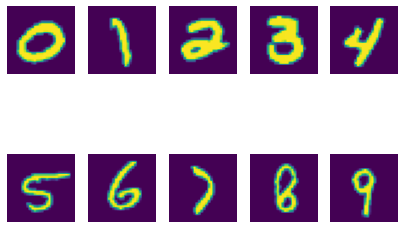

In [2]:
# PLotting each of the ten digits
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_val = X_train[:6000]
y_val = y_train[:6000]
X_train = X_train[6000:]
y_train = y_train[6000:]

fig, axes = plt.subplots(2, 5)
axes = axes.ravel()

inds = []
for y in range(10):
    inds.append(np.argmax(y == y_train))
ten_digits = X_train[inds]

for digit, ax in zip(ten_digits, axes):
    ax.grid('off')
    ax.axis('off')
    ax.imshow(digit, cmap='viridis')

In [ ]:
# Training a simple Keras MLP
K.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_shape=[1] + list(X_train[0].shape)))
model.add(keras.layers.Dense(64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()
loss = keras.losses.SparseCategoricalCrossentropy()
metrics = [keras.metrics.Accuracy()]
model.compile(loss=loss, metrics=metrics)
model.fit(X_train, y_train, validation_data=(X_val,  y_val), epochs=1)

In [47]:
X_train[0].shape

(28, 28)

In [43]:
help(keras.models.Model().fit)

Help on method fit in module tensorflow.python.keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs) method of tensorflow.python.keras.engine.training.Model instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Arguments:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return a tuple
            of e

In [14]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(28, 64) dtype=float32, numpy=
 array([[ 0.13471225,  0.13047034, -0.00586879, ...,  0.05418891,
         -0.02836561,  0.21018389],
        [-0.20016578,  0.16142818, -0.12401477, ..., -0.05283862,
          0.12993813,  0.04025888],
        [ 0.21058115,  0.05065498,  0.16322586, ...,  0.01083368,
          0.20645738,  0.09598517],
        ...,
        [-0.07818547, -0.21561289, -0.06183718, ...,  0.0279285 ,
          0.12072396,  0.01319778],
        [ 0.08259061, -0.2219417 ,  0.19507357, ..., -0.04919535,
         -0.00923035,  0.24565253],
        [-0.07075025, -0.15488489, -0.20260575, ..., -0.02616967,
         -0.16993782,  0.16953245]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(64,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.